In [2]:
import requests
import matplotlib.pyplot as plt

BASE_URL = "http://127.0.0.1:8000"

def run_sim(payload, include_series=True):
    r = requests.post(
        f"{BASE_URL}/simulations/run",
        params={"include_series": str(include_series).lower()},
        json=payload,
        timeout=30,
    )
    r.raise_for_status()
    return r.json()

In [3]:
baseline = {"setpoint": 5, "kp": 0.8, "ki": 0.02, "kd": 0.05, "k_u": -0.8}
out_base = run_sim(baseline, include_series=True)
out_base["metrics"]

{'overshoot_abs': 15.0, 'iae': 275.01147087050686, 'settling_time_s': None}

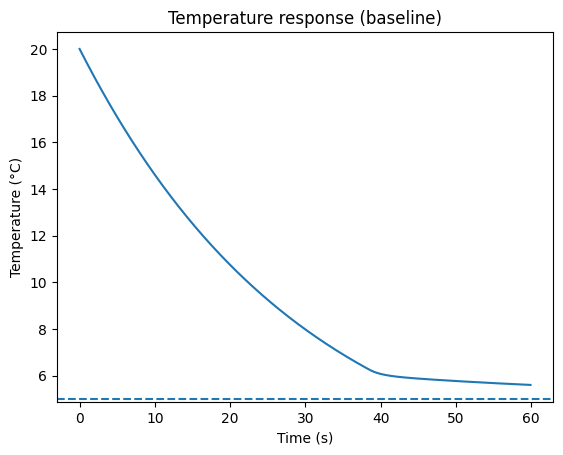

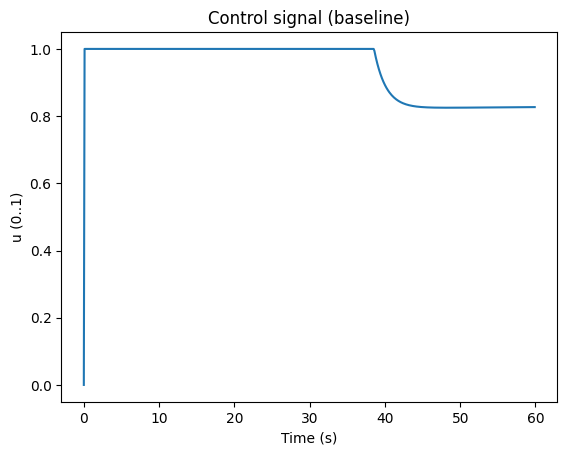

In [4]:
t = out_base["t"]
T = out_base["T"]
u = out_base["u"]

plt.figure()
plt.plot(t, T)
plt.axhline(baseline["setpoint"], linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature response (baseline)")
plt.show()

plt.figure()
plt.plot(t, u)
plt.xlabel("Time (s)")
plt.ylabel("u (0..1)")
plt.title("Control signal (baseline)")
plt.show()


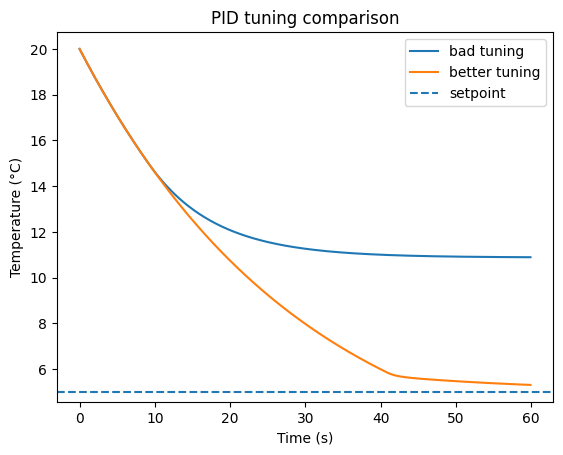

({'overshoot_abs': 15.0, 'iae': 447.7329151302946, 'settling_time_s': None},
 {'overshoot_abs': 15.0,
  'iae': 269.51600554906105,
  'settling_time_s': 48.900000000000006})

In [5]:
bad = {"setpoint": 5, "kp": 0.1, "ki": 0.0, "kd": 0.0, "k_u": -0.8}
better = {"setpoint": 5, "kp": 1.2, "ki": 0.05, "kd": 0.1, "k_u": -0.8}

out_bad = run_sim(bad, include_series=True)
out_better = run_sim(better, include_series=True)

plt.figure()
plt.plot(out_bad["t"], out_bad["T"], label="bad tuning")
plt.plot(out_better["t"], out_better["T"], label="better tuning")
plt.axhline(5, linestyle="--", label="setpoint")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")
plt.title("PID tuning comparison")
plt.legend()
plt.show()

out_bad["metrics"], out_better["metrics"]
